In [3]:
import InterPenet as ip
#from Penetration import InterPenet as ip
import tkinter as tk
root = tk.Tk()
root.geometry('1000x700')
app = ip.Application(master=root)
app.mainloop()

In [3]:
# 'Me': {'mean': 1.1, 'cov': 0.05, 'dist': 'normal'},
import pickle
#from Penetration import InterPenet as ip
fname='DeMarre.pkl'
with open(fname,'rb') as f:
    df = pickle.load(f)
df

{'b': {'mean': 0.004, 'cov': 0.01, 'dist': 'normal'},
 'd': {'mean': 0.02, 'cov': 0.01, 'dist': 'normal'},
 'm': {'mean': 0.197, 'cov': 0.01, 'dist': 'normal'},
 'v': {'mean': 130.0, 'cov': 0.1, 'dist': 'normal'},
 'Me': {'mean': 1.1, 'cov': 0.05, 'dist': 'normal'},
 'Title': 'Example for DeMarre',
 'formula': 'DeMarre'}

In [3]:
df={'b': {'mean': 0.004, 'cov': 0.01, 'dist': 'normal'},
 'd': {'mean': 0.02, 'cov': 0.01, 'dist': 'normal'},
 'm': {'mean': 0.197, 'cov': 0.01, 'dist': 'normal'},
 'v': {'mean': 130.0, 'cov': 0.1, 'dist': 'normal'},
 'Me': {'mean': 1.1, 'cov': 0.05, 'dist': 'normal'},
 'Title': 'Example for DeMarre',
 'formula': 'DeMarre'}

In [4]:
### pickleで保存（書き出し）
with open(fname, mode='wb') as fo:
  pickle.dump(df, fo)

File[ Jowett.pkl ]
-------------- Jowett Formula --------------
**Validation of [ vbl ] satisfied**
**Validation of [ Su ] not satisfied**: ,Value= 490000000.0
**Validation of [ Limp/d ] satisfied**
**Validation of [ b/d ] satisfied**
*** Probabilistic analysis ***
variable= ['b', 'd', 'm', 'Su', 'v', 'Me']
beta= -1.032868910032127
Alpha= [ 0.0703227   0.05093352 -0.04046155  0.20015629 -0.89088495  0.39633928]
Pf= 0.8491673750406643
*** Analysis of Balistic Limit Velocity ***
Vbl= 120.56876281894876
File[ Jowett.pkl ]
*** Analysis of Balistic Limit Velocity ***
Vbl= 120.56876281894876

In [1]:
import InterPenet as ip
ip.InterPenet()

*** Output is redirected to Panel


In [2]:
!pyinstaller interP.py --onefile --noconsole

1271 INFO: PyInstaller: 6.4.0, contrib hooks: 2024.1
1271 INFO: Python: 3.12.2
1327 INFO: Platform: Windows-11-10.0.22621-SP0
1333 INFO: wrote c:\Users\sakai\FraDⅡ Dropbox\Sakai Shinsuke\2023\科研費\PYTHON\interP.spec
1344 INFO: Extending PYTHONPATH with paths
['c:\\Users\\sakai\\FraDⅡ Dropbox\\Sakai Shinsuke\\2023\\科研費\\PYTHON']
3483 INFO: checking Analysis
3816 INFO: Building because C:\Users\sakai\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\Penetration\InterPenet.py changed
3816 INFO: Initializing module dependency graph...
3835 INFO: Caching module graph hooks...
4034 INFO: Analyzing base_library.zip ...
7888 INFO: Loading module hook 'hook-heapq.py' from 'C:\\Users\\sakai\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python312\\site-packages\\PyInstaller\\hooks'...
7932 INFO: Loading module hook 'hook-encodings.py' from 'C:\\Users\\sakai\\AppDat

In [ ]:
import sys
from io import StringIO

# プログラムの出力をキャプチャするための StringIO オブジェクトを作成します
output = StringIO()
sys.stdout = output

# print 文を使って出力を行います
print("Hello, world!")
print("This is a test.")

# キャプチャした出力を文字列として取得します
output_str = output.getvalue()

# sys.stdout を元に戻します
sys.stdout = sys.__stdout__

# キャプチャした出力を表示します
print("Captured output:")
print(output_str)

In [ ]:
output_str

In [ ]:
from Penetration import InterPenet as ip
bb=ip.Base()
bb.CalcPenet('BRL.pkl')
bb.CalcPenet('Jowett.pkl')

2024/2/14段階のエラー対策  (Jowettクラス対応時)    
このエラーは、Jowettクラスのように、貫通管理クラス内のクラスGの中に特殊処理が含まれる場合に、これまでは正常に処理していなかったことが判明したものである。最終的には、処理を完了した。2024.2.14
1.  InterPenetにおいてCalcボタンを押したときにbb.Calc()の実行時にエラーがでる
1.  bbは、initで定義されるBaseクラスのインスタンス。BaseクラスはInterPenetモジュール内の、全貫通公式を管理するクラス
1.  Baseクラス内のCalc関数でlsfm=self.formula.RelSet(df)実施時にエラーが出る。formulaは貫通公式クラスのインスタンス
1.  formula.RelSet(df)により、formulaの親クラスであるpenMed内のRelSetが呼ばれる。実際にはさらにその親クラスであるLimitState.RelBase.RelSet関数が呼ばれる。
1.  その中でGmanageクラスでself.lsmfインスタンスの生成時にエラーが出ている
1.  Gmanageクラスの初期化時にLSFM.__init__(n,Mu,sigmmaX,dist)を呼ぶ際にエラーが出ている
1.  LSFMの初期化時には、self.GetG()にてg値を一度計算する。ここに到達する時点では、Gmanageクラスの初期化プロセスで、限界状態関数は、self.limにて定義されている。しかし、その段階のself.limでは、SetParamの処置は終わっておらず、その状態でself.lim.gcalc()を呼んだ時点でエラーが出るのは必然


Calcボタンを押したときの実行プロセス
1.  起動時にモジュールInterPenet内のApplicationのinitにて、self.bb=Base()にて、Baseクラスのインスタンスbbが作られている。BaseクラスはInterPenetモジュール内の、全貫通公式を管理するクラス
1.  モジュールInterPenet内のApplication.Calc_click()が呼ばれる
1.  self.searchFormula(form=df['formula'])が呼ばれ、self.formulaに貫通公式クラスのインスタンスが生成される。貫通公式クラスは、LSFMクラスの孫クラスにあたる。LSFM->penMed->貫通公式クラス
1.  貫通公式のクラスG内に特殊処理が求められる時は必要なパラメータをdictにセットする
1.  Calc_click()内で確率計算のときself.bb.Calc(df,dict=dict)、速度計算のみのときself.bb.Vbl(df,dict=dict)が呼ばれる。このとき、dictに辞書型データがセットされているときには、呼び出し関数内で、貫通公式.G.setDict(dict)が自動的に実行される。貫通公式内では、setDict関数内で、特定のパラメータ設定や、必要計算を行うことを想定している。
1.  Baseクラス内のCalc関数でself.formula.Reliability(df,dict=dict)で信頼性評価が実施される
1.  self.formulaから各種メソッドにより必要情報を引き出すことができる

### 手順
1. まず、ip.Drawing()により、tk.interの画面が出る
1. 入力データとしてLambert.pklのpickleデータを読み取る
1. 等高線表示パラメータ二つを選択して、ラジオボタンをクリック
1. そのパラメータの最小、最大、分割数を入力
1. Calcボタンを押すと、その条件で計算される
1. Drawボタンを押すと描画される


In [ ]:
ip.Drawing()

In [5]:
import InterPenet as ip
#import sys
#sys.stdout = open('result.txt', 'w') #標準出力の変更
bb=ip.Base()
bb.CalcPenet('AlyLi.pkl')
bb.CalcPenet('BRL.pkl')
bb.CalcPenet('DeMarre.pkl')
bb.CalcPenet('Jowett.pkl')
bb.CalcPenet('Lambert.pkl')
bb.CalcPenet('Neilson.pkl')
bb.CalcPenet('Ohte.pkl')
bb.CalcPenet('SRI.pkl')
bb.CalcPenet('SwRI.pkl')
bb.CalcPenet('THOR.pkl')
bb.CalcPenet('WenJones.pkl')

In [2]:
import InterPenet as ip
bb=ip.Base()
df=bb.CalcPenet('AlyLi.pkl')

In [3]:
import InterPenet as ip
bb=ip.Base()
df=bb.read_pickle('AlyLi.pkl')
bb.setDf(df)
bb.apCalc()

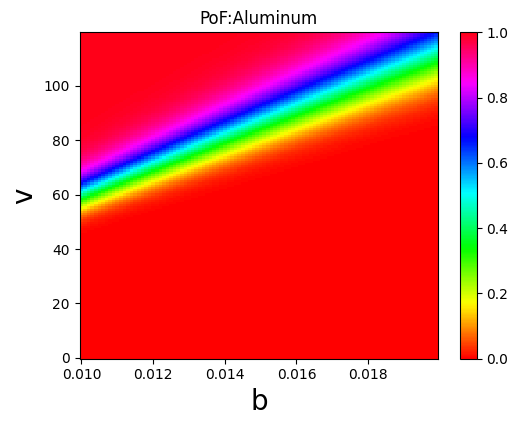

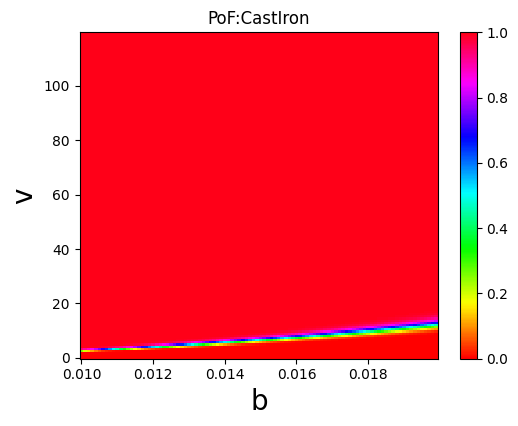

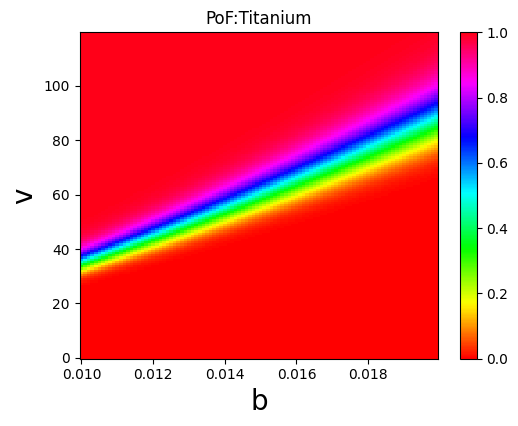

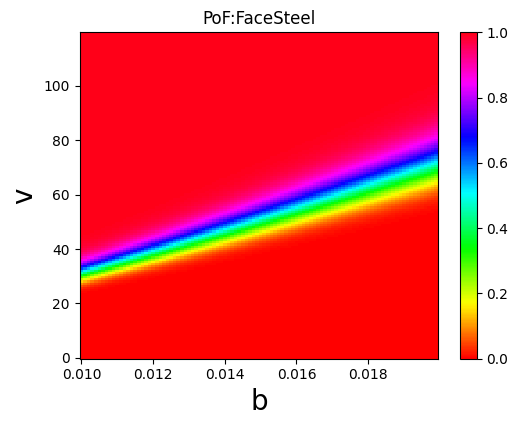

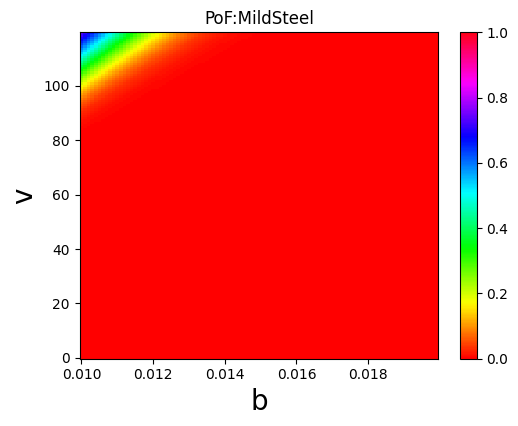

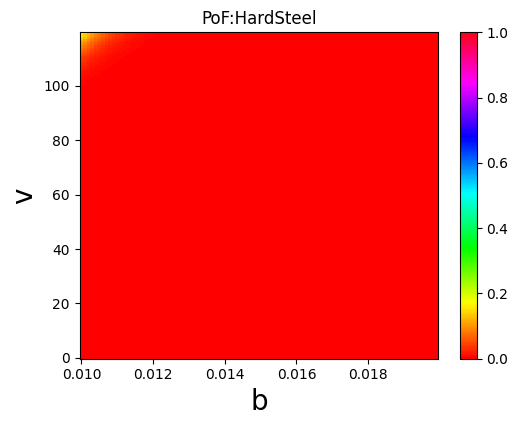

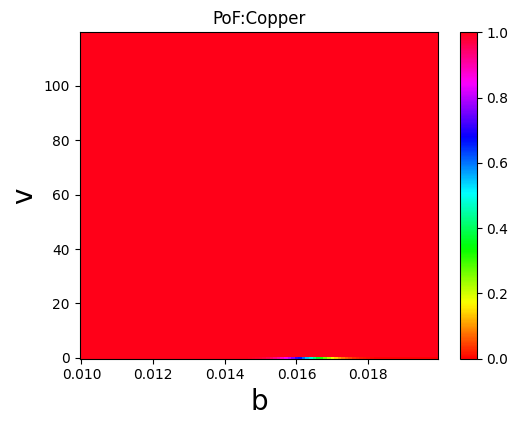

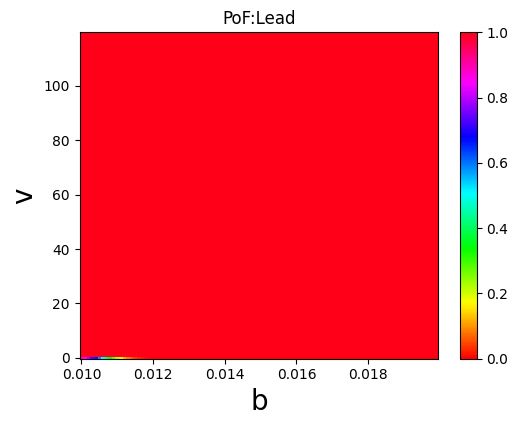

In [3]:
import InterPenet as ip
import pickle
fname='THOR.pkl'
with open(fname,'rb') as f:
    df = pickle.load(f)
ddata={'kinds':'contour',
       'ind':0,
       'title':'Probability of filure',
       'cdata':{
            'b':{'min':0.01,'max':0.02,'div':100},
            'v':{'min':0.1,'max':120,'div':150},
       }
}
bb=ip.Base()
df=bb.read_pickle(fname)
df['Material']='Aluminum'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='CastIron'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='Titanium'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='FaceSteel'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='MildSteel'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='HardSteel'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='Copper'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)
df['Material']='Lead'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)

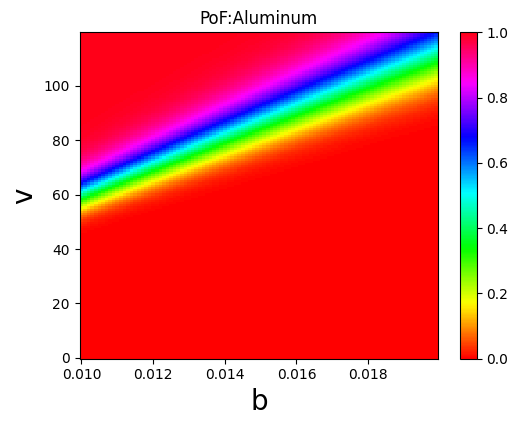

In [1]:
import InterPenet as ip
import pickle
fname='THOR.pkl'
ddata={'kinds':'contour',
       'ind':0,
       'title':'Probability of filure',
       'cdata':{
            'b':{'min':0.01,'max':0.02,'div':100},
            'v':{'min':0.1,'max':120,'div':150},
       }
}
bb=ip.Base()
df=bb.read_pickle(fname)
df['Material']='Aluminum'
ddata['title']='PoF:'+df['Material']
bb.draw_contour(df,ddata)


In [2]:
import InterPenet as ip
import sys
sys.stdout = open('result.txt', 'w') #標準出力の変更
bb=ip.Base()
fname=['AlyLi.pkl','BRL.pkl','DeMarre.pkl','Jowett.pkl','Lambert.pkl','Neilson.pkl','Ohte.pkl','SRI.pkl','THOR.pkl','WenJones.pkl']
rest={}
for fn in fname:
    df=bb.read_pickle(fn)
    res=bb.CalcDict(df)
    rest[list(res.keys())[0]]=res[list(res.keys())[0]]


AttributeError: 'AlyLi' object has no attribute 'df'

In [ ]:
import pandas as pd
df=pd.DataFrame()
Pf=[]; beta=[]; unsatis=[]; b=[]; d=[]; m=[]; v=[]
for form in list(rest.keys()):
    Pf.append(rest[form]['Pf'])
    beta.append(rest[form]['beta'])
    unsatis.append(rest[form]['unsatisfied'])
    print(form)
    b.append(rest[form]['Alpha'][rest[form]['variable'].index('b')])
    d.append(rest[form]['Alpha'][rest[form]['variable'].index('d')])
    m.append(rest[form]['Alpha'][rest[form]['variable'].index('m')])
    v.append(rest[form]['Alpha'][rest[form]['variable'].index('v')])
df['fname']=fname
df['unsatisfied']=unsatis
df['Pf']=Pf
df['beta']=beta
df['a_b']=b
df['a_d']=d
df['a_m']=m
df['a_v']=v
df

In [ ]:
for fn in list(rest.keys()):
    print(fn,rest[fn]['variable'])